# 1. Preliminary

## 1.1 Context

## 1.2 Imports

In [1]:
import os, sys, time

import nltk
import spacy

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px

## 1.3 Loading data

In [2]:
# our file

data = "./data/source/"
os.listdir(data)

['superheroes_nlp_dataset.csv', 'twit_from_disaster_train.csv']

In [3]:
# load dataframe

fn = data + 'twit_from_disaster_train.csv'

df = pd.read_csv(fn)

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


# 2. First Tour

## 2.1 display

In [5]:
df.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
df.sample(10)

,id,keyword,location,text,target
3311,4744,evacuate,NaN,The summer program I worked for went the city ...,0
4391,6243,hijacking,"perth, australia",#hot Funtenna: hijacking computers to send da...,0
6248,8926,snowstorm,NaN,@PyrBliss ah I remember those days. In a snows...,1
5672,8095,rescued,NaN,Britons rescued amid Himalaya floods (http://t...,1
6723,9634,thunderstorm,73101,Severe Weather Statement issued August 05 at 9...,1
7299,10445,wild%20fires,NaN,Some great footage of STRONG work from San Ber...,1
4299,6105,hellfire,?????? ??? ?????? ????????,#Allah describes piling up #wealth thinking it...,0
4085,5805,hail,"Windsor,Ontario",@KMacTWN @meaganerd Looks like a bowl of weath...,0
7342,10513,wildfire,"Columbus, OH",I honestly wonder what it is that I had to do ...,0
5646,8056,refugees,NaN,...//..// whao.. 12000 Nigerian refugees repat...,1


In [7]:
df.tail(5)

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


## 2.2 Structure

In [8]:
df.shape

(7613, 5)

In [9]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [11]:
df.dtypes.value_counts()

object    3
int64     2
dtype: int64

In [12]:
tmp = df.nunique()
tmp

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

In [13]:
tmp[tmp <10]

target    2
dtype: int64

In [14]:
tmp[tmp>1000]

id          7613
location    3341
text        7503
dtype: int64

## 2.3 NaN and duplicated

In [15]:
df.isna().mean().sort_values()

id          0.000000
text        0.000000
target      0.000000
keyword     0.008013
location    0.332720
dtype: float64

<AxesSubplot:>

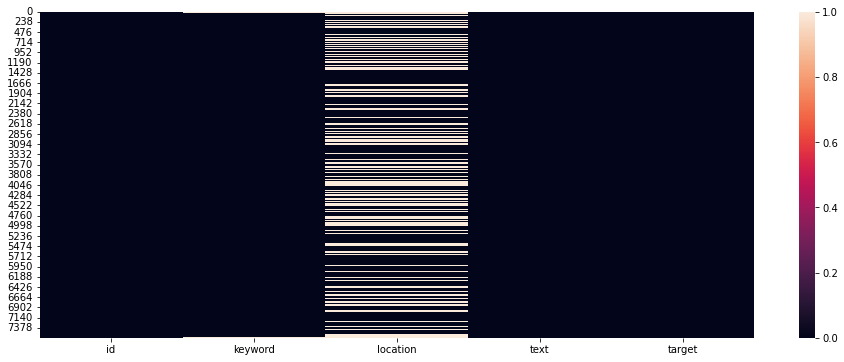

In [17]:
tmp = df.isna().mean()

fig, ax = plt.subplots(1,1, figsize=(16, 6))
sns.heatmap(df.isna())


In [18]:
df.duplicated().sum()

0

## 2.4 Data inspection

In [19]:
df.describe(include=np.number)

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [20]:
df.describe(include=np.object)

/tmp/ipykernel_9042/3211851552.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=np.object)


,keyword,location,text
count,7552,5080,7613
unique,221,3341,7503
top,fatalities,USA,11-Year-Old Boy Charged With Manslaughter of T...
freq,45,104,10


# 3. Cleaning

## 3.1 select columns

In [21]:
tmp = df.dtypes
tmp

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [22]:
tmp[tmp =="object"]

keyword     object
location    object
text        object
dtype: object

In [24]:
cols = ["text", "target"]
df = df[cols]
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


## 3.2 drop NaN

In [26]:
df.isna().mean()

text      0.0
target    0.0
dtype: float64

,name,overall_score,history_text,_score
631,Imperiex,87,"The embodiment of entropy, Imperiex takes the ...",87.0
732,Khanjikhan,89,"At an unknown point in time, Khanjikhan marrie...",89.0
1143,Sensei Yang,94,"At an unknown point in time, Yang went on a qu...",94.0
980,Omega,108,When garmadon and Lloyd were about to destroy ...,108.0
389,Destruction Of The Endless,112,Destruction is the fourth eldest of the Endles...,112.0
407,Doctor Strange (Classic),120,Stephen Strange was born to Eugene and Bever...,120.0
420,Dr Manhattan,124,Jonathan Osterman was born in 1929. His fathe...,124.0
983,One-Above-All,125,Undoubtedly the most mysterious character wit...,125.0
916,Monstrox,126,The Book of Monsters was formerly a necromance...,126.0
416,Dormammu,142,Born untold thousands or even millions of year...,142.0


# 4. Exploratory Data Analysis

## 4.1 target

In [27]:
df.describe()

,target
count,7613.00000
mean,0.42966
std,0.49506
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [32]:
df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [34]:
df.target.value_counts(normalize=lize=alize=True)

0    0.57034
1    0.42966
Name: target, dtype: float64

<AxesSubplot:ylabel='target'>

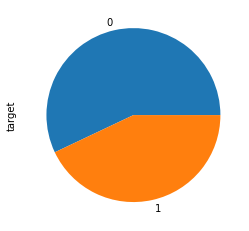

In [35]:
df.target.value_counts().plot(kind="pie")

AttributeError: 'DataFrame' object has no attribute '_score'

## 4.1 Length

In [37]:
df.describe(include="object")

,text
count,7613
unique,7503
top,11-Year-Old Boy Charged With Manslaughter of T...
freq,10


count                                                  7613
unique                                                 7503
top       11-Year-Old Boy Charged With Manslaughter of T...
freq                                                     10
Name: text, dtype: object

/home/alex/Desktop/ocr-donnees-textuelles/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='text'>

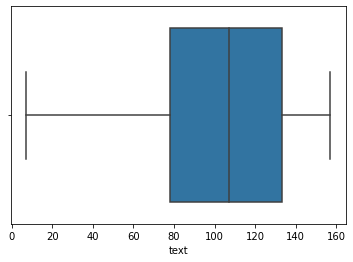

In [38]:
tmp = df.text.str.len()
sns.boxplot(tmp)

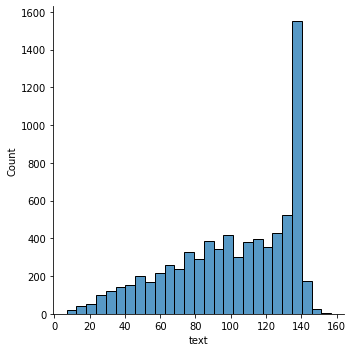

In [42]:
sns.displot(tmp)

In [40]:
df["_len_txt"] = tmp

# 

In [43]:
corr = df.corr()
corr

,target,_len_txt
target,1.000000,0.181817
_len_txt,0.181817,1.000000


<AxesSubplot:>

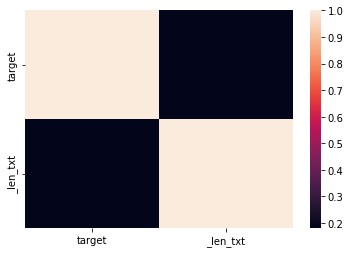

In [44]:
sns.heatmap(corr)

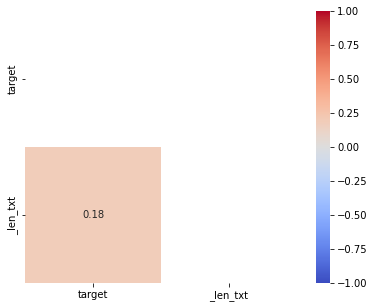

In [45]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(7, 5))
ax = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, cmap="coolwarm", annot=True, fmt=".2f", square=True)

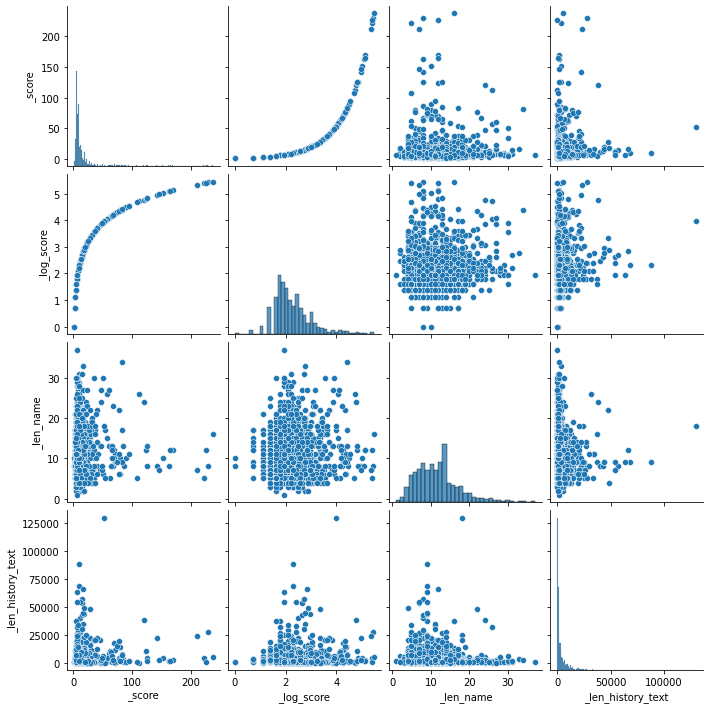

In [719]:
sns.pairplot(df)

In [720]:
df["_cat"] = pd.cut(df._score, bins=5, labels=list("edcba"))
df.head()

,name,history_text,_score,_log_score,_len_name,_len_history_text,_cat
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",6.0,1.791759,7,509,e
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,10.0,2.302585,13,3755,e
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...",20.0,2.995732,6,5849,e
3,Aa,Aa is one of the more passive members of the P...,12.0,2.484907,2,5924,e
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,5.0,1.609438,10,123,e


In [721]:
df.sort_values("_cat").head()

,name,history_text,_score,_log_score,_len_name,_len_history_text,_cat
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",6.0,1.791759,7,509,e
951,Night King,The Night King was a First Man that was captur...,13.0,2.564949,10,584,e
950,Nick Fury,"The eldest of three children, Nicholas Joseph...",6.0,1.791759,9,17921,e
949,Nick Fury (MCU),"Nicholas ""Nick"" Joseph Fury was a former Colon...",8.0,2.079442,15,3845,e
948,Neuro,Neuro was born as the descendant of the Elemen...,13.0,2.564949,5,203,e


In [722]:
df.sort_values("_cat").tail()

,name,history_text,_score,_log_score,_len_name,_len_history_text,_cat
538,Great Evil Beast,The Great Evil Beast was formed when God utter...,237.0,5.468060,16,5295,a
527,Golden Ninja,"Lloyd becomes the Golden Ninja, and fights the...",226.0,5.420535,12,266,a
393,Devilman,Transformation Akira is first seen walking hom...,229.0,5.433722,8,27732,a
110,Aztar,Since the beginnings of human civilization the...,222.0,5.402677,5,3796,a
421,Dracula,The man later known as Dracula was originally...,211.0,5.351858,7,23504,a


In [723]:
df["_log_cat"] = pd.cut(df._log_score, bins=5, labels=list("edcba"))
df.head()

,name,history_text,_score,_log_score,_len_name,_len_history_text,_cat,_log_cat
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",6.0,1.791759,7,509,e,d
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,10.0,2.302585,13,3755,e,c
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...",20.0,2.995732,6,5849,e,c
3,Aa,Aa is one of the more passive members of the P...,12.0,2.484907,2,5924,e,c
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,5.0,1.609438,10,123,e,d


In [724]:
df.sort_values("_log_cat").head()

,name,history_text,_score,_log_score,_len_name,_len_history_text,_cat,_log_cat
758,Kool-Aid Man,Before he was officially the Kool-Aid Man in 1...,2.0,0.693147,12,1937,e,e
665,Jaime Lannister,Jaime is the eldest son of Joanna Lannister an...,2.0,0.693147,15,3577,e,e
994,Paul Blart,Paul Blart is a mall cop. Everyday he protect...,1.0,0.000000,10,284,e,e
70,Aquababy,Arthur Curry Jr. was born the son of the Atla...,2.0,0.693147,8,397,e,e
129,Bathound,Ace was the guide dog of a blind native Americ...,1.0,0.000000,8,439,e,e


In [725]:
df.sort_values("_log_cat").tail()

,name,history_text,_score,_log_score,_len_name,_len_history_text,_cat,_log_cat
945,Nekron,"Nekron is the Lord of the Unliving, one of the...",80.0,4.382027,6,1427,d,a
362,Darth Nihilus,Darth Nihilus (pronounced /ˈnaɪ.ə.lɨs/) was a ...,84.0,4.430817,13,3158,d,a
416,Dormammu,Born untold thousands or even millions of year...,142.0,4.955827,8,22389,c,a
1293,The Overlord,"Before Ninjago's creation, there were two kind...",165.0,5.105945,12,1187,b,a
1311,Thor (Odin Force),"Thor has traveled across the realms, battling ...",83.0,4.418841,17,7165,d,a


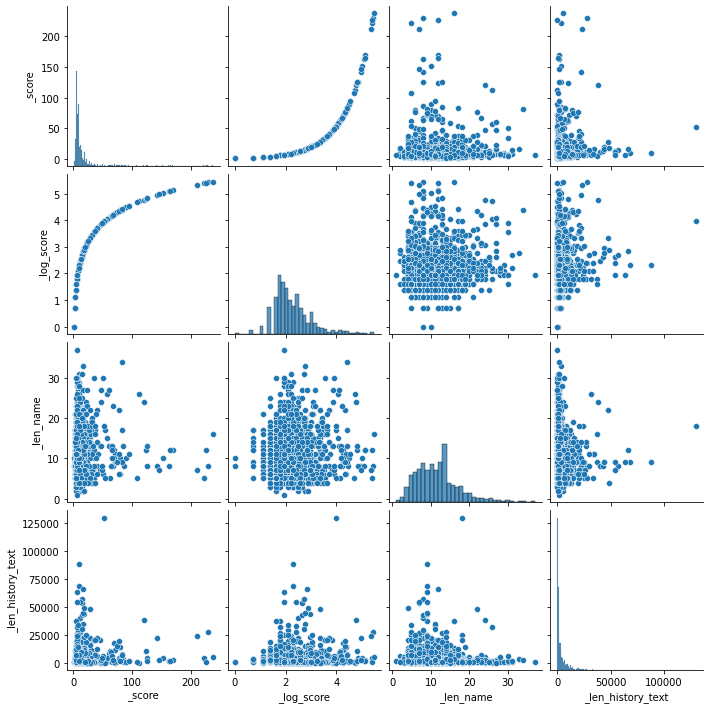

In [726]:
sns.pairplot(df,)

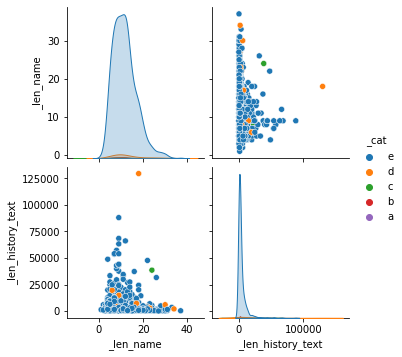

In [727]:
sns.pairplot(df.drop(columns=["_score", "_log_score"]),hue="_cat")

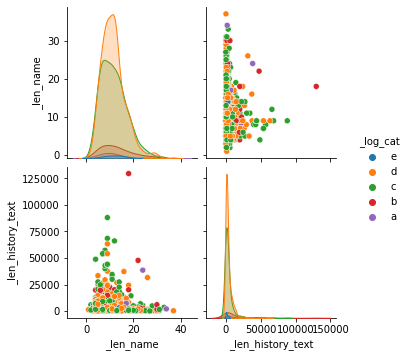

In [729]:
sns.pairplot(df.drop(columns=["_score", "_log_score"]),hue="_log_cat")

In [730]:
df

,name,history_text,_score,_log_score,_len_name,_len_history_text,_cat,_log_cat
0,3-D Man,"Delroy Garrett, Jr. grew up to become a track ...",6.0,1.791759,7,509,e,d
1,514A (Gotham),He was one of the many prisoners of Indian Hil...,10.0,2.302585,13,3755,e,c
2,A-Bomb,"Richard ""Rick"" Jones was orphaned at a young ...",20.0,2.995732,6,5849,e,c
3,Aa,Aa is one of the more passive members of the P...,12.0,2.484907,2,5924,e,c
4,Aaron Cash,Aaron Cash is the head of security at Arkham A...,5.0,1.609438,10,123,e,d
...,...,...,...,...,...,...,...,...
1445,Zatanna,Zatanna is the daughter of adventurer John Zat...,10.0,2.302585,7,1532,e,c
1446,Zero,Zero was created by the late Dr. Albert Wily ...,18.0,2.890372,4,48848,e,c
1447,Zoom (New 52),"Hunter Zolomon is better known as Zoom, a spee...",20.0,2.995732,13,395,e,c
1448,Zoom,Hunter Zolomon had a troubled relationship wi...,9.0,2.197225,4,7173,e,c


In [731]:
df.to_csv("data/cleaned/df.csv", index=False)